In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd
import statsmodels.api as sm

import warnings
warnings.simplefilter('ignore')

from utils import get_dataframe

In [2]:
# load data
data = get_dataframe()
data.head()

,Datum und Uhrzeit,Gesamtanlage[kWh],FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK
0,01.01.2019,1.71013,15.2,4.8,1.6,8,0.0,0,7.9,7.1,965.6,4.1,87.0,5.2,2.7,1.9
1,02.01.2019,0.02722,17.0,6.0,0.6,8,0.7,0,7.0,5.0,965.5,0.4,78.0,3.2,-2.1,-4.8
2,03.01.2019,0.49862,10.1,4.1,0.0,8,2.9,0,7.4,3.9,971.2,-1.9,73.0,-0.6,-3.1,-4.4
3,04.01.2019,0.00908,12.1,4.2,5.0,8,0.0,0,7.7,4.8,970.3,-1.1,85.0,-0.3,-1.7,-2.2
4,05.01.2019,0.00005,16.1,6.5,22.1,8,0.0,5,7.6,5.9,963.8,0.0,96.0,1.0,-0.9,-0.8


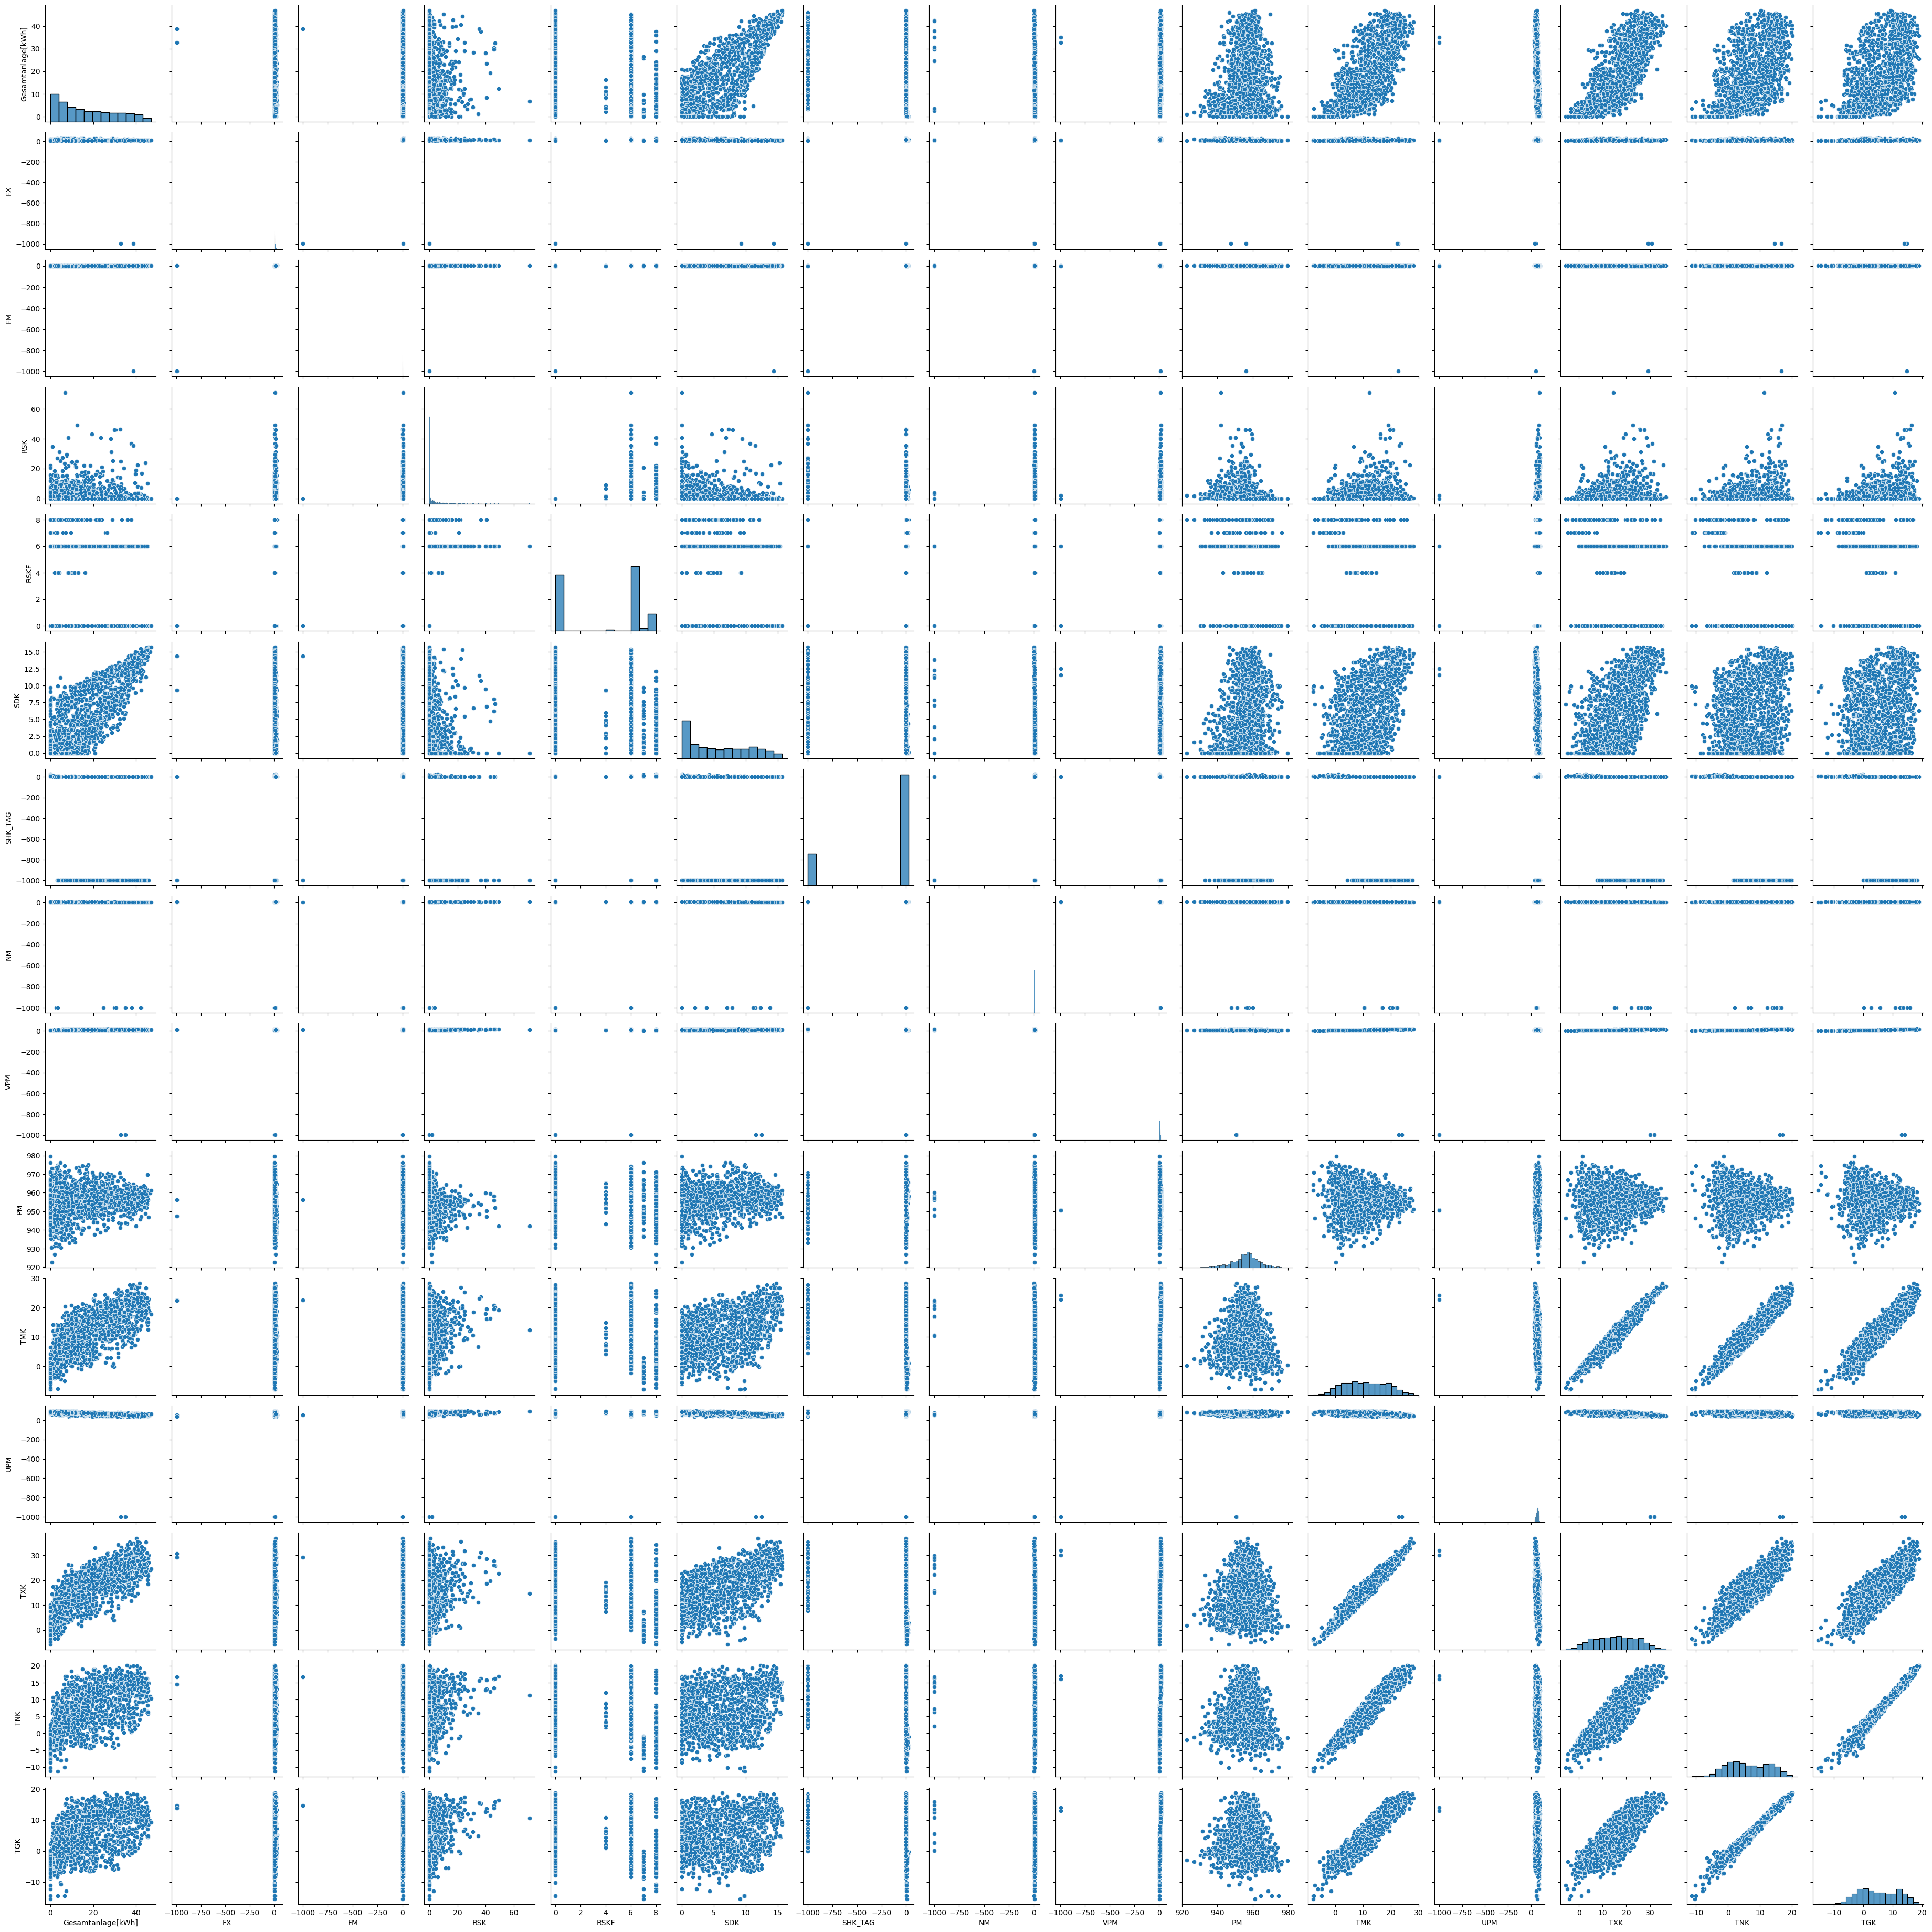

In [3]:
sns.pairplot(data)
plt.show()

In [4]:
# pairwise correlation
pairwise_corr = {}
for feature in data.columns[1:]:
    pairwise_corr[feature] = []
    for second_feature in data.columns[1:]:
        res = stats.pearsonr(data[feature], data[second_feature])
        pairwise_corr[feature].append(res.statistic)
pairwise_corr_df = pd.DataFrame.from_dict(pairwise_corr, orient='index', columns=data.columns[1:])

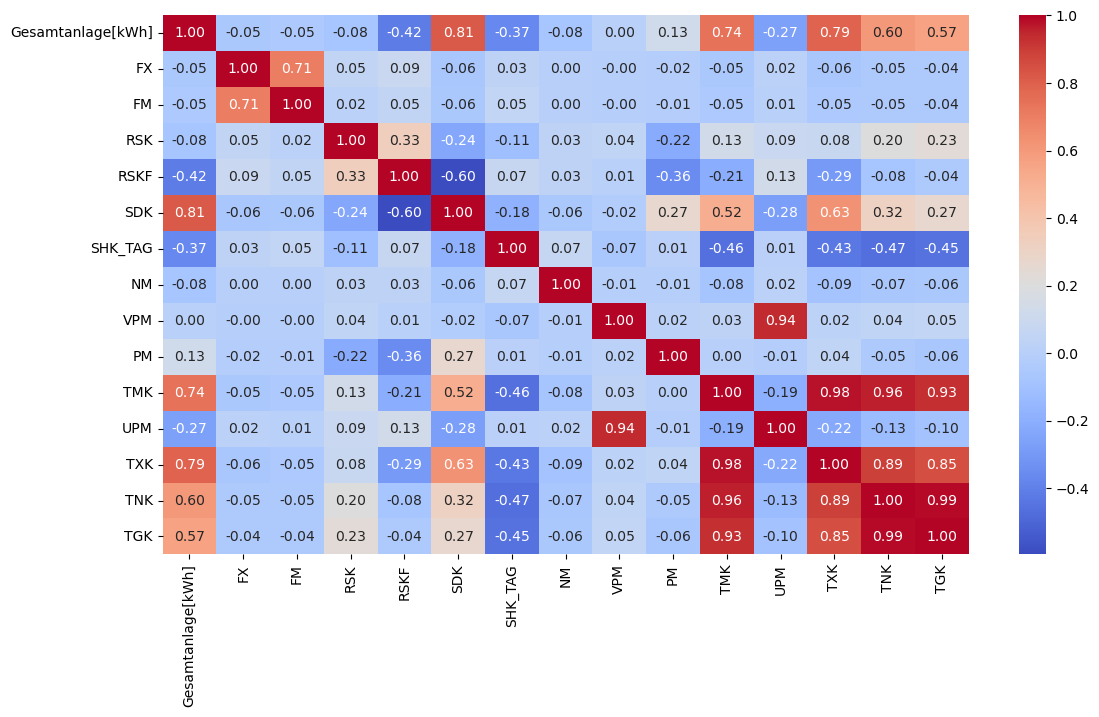

In [5]:
plt.figure(figsize=(13, 7))
sns.heatmap(pairwise_corr_df, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})
plt.show()